In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from preprocessor import Preprocessor

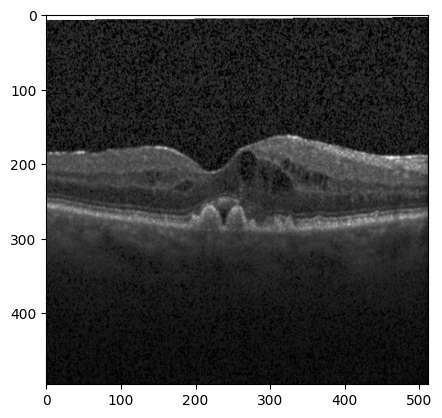

In [42]:
image = cv2.imread("../data/test_image14.jpeg")
prep = Preprocessor()
plt.imshow(image)
plt.show()

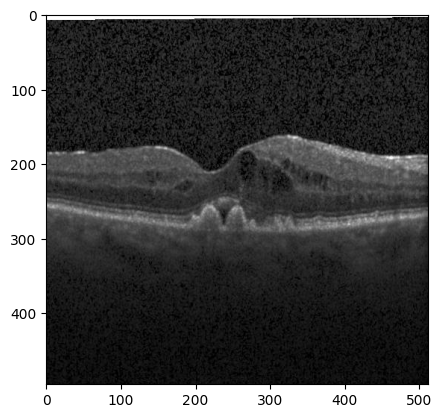

In [43]:
converted_image = prep.convert_to_gray(image)
plt.imshow(converted_image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

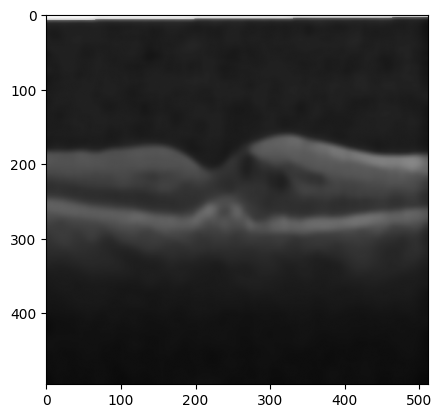

In [44]:
filtered_image = prep.smooth_image(converted_image)
plt.imshow(filtered_image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

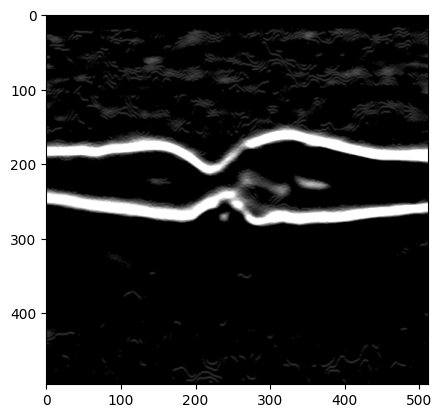

In [45]:
sobel_image = prep.sobel(filtered_image)
plt.imshow(sobel_image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

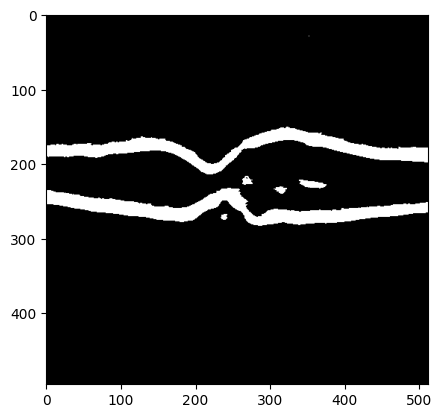

In [46]:
ret2, binary = prep.threshold(sobel_image)
plt.imshow(binary, cmap='gray', vmin = 0, vmax = 255)
plt.show()

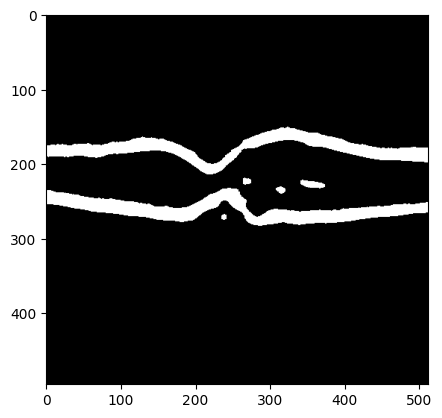

In [47]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
binary = prep.morph_open(binary, element)
binary = prep.morph_close(binary, element)
plt.imshow(binary, cmap='gray', vmin = 0, vmax = 255)
plt.show()

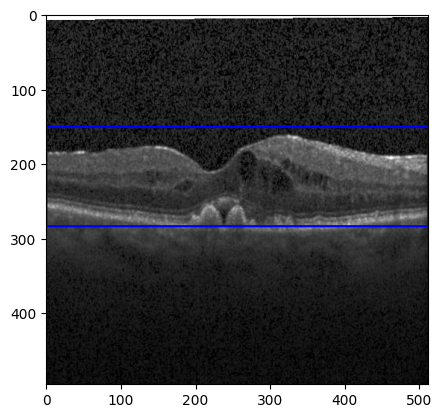

In [48]:
contours = prep.get_contours(binary)
x, y, w, h = cv2.boundingRect(np.vstack(contours))
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
plt.imshow(image, cmap='gray', vmin = 0, vmax = 255)
plt.show()